In [1]:
%pip install pyreadstat

You should consider upgrading via the 'c:\Users\Administrator\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
from pathlib import Path
import pyreadstat
import src

project_dir = Path(src.__file__).parents[1]
data_dir = project_dir / 'data'



df, metadata = pyreadstat.pyreadstat.read_sav(
    filename_path=f"C:/Users/Administrator/Desktop/eksploracja/alternative/medical-trends-exploration/data/external/archiwum_danych_spolecznych/P0053SAV.sav",
    encoding='cp1250')

In [3]:
for col_name in metadata.column_labels:
    print(col_name)

Numer kolejny rekordu
Rok badania PGSS
Waga analityczna
Wagi dla balotów A i B  (tylko 2002 r.)
Podpróby losowe PGSS: A/B
Podpróby losowe A-B + rok PGSS
Wersje pytań kwestionariuszy: X/Y
Moduły międzynarodowe ISSP
Suplementy tematyczne PGSS/rok
Województwo zamieszkania (49 województw)
Województwo zamieszkania (16 woj. od 1999 r.)
Region zamieszkania (8 regionów)
6 regionów GUS (wg 16 województw)
Wielkość miejscowości zamieszkania
Miasta 100 tys+ mieszkańców (od 1999 r.)
Liczba osób w gospodarstwie domowym
L.osób w gosp domowym do 6 lat
L.osób w gosp domowym 6-12 lat
L.osób w gosp domowym 13-17 lat
L.osób dorosłych w gosp dom 18+lat
Wydatki na badania naukowe
Wydatki na ochronę środowiska
Wydatki na ochronę zdrowia
Wydatki na walkę z przestępczością
Wydatki na walkę z narkomanią
Wydatki na szkolnictwo
Wydatki na wojsko i obronność
Wydatki na pomoc dla ludzi ubogich
Czy lubi Japonię
Czy lubi Niemcy
Czy lubi USA
Czy lubi Anglię
Czy lubi Izrael
Czy lubi Czechy
Czy lubi Słowację
Czy lubi Cz

In [4]:
for i, col_name in enumerate(df.columns):    
    label = metadata.column_labels[i]
    df[label] = df[col_name]
    df.drop(columns=[col_name], inplace=True)
year_column = 'Rok badania PGSS'
df[year_column] = df[year_column].astype(int).astype(str)

In [5]:
def find_values_for_column(look_for):
    return metadata.variable_value_labels[next(col for col in metadata.column_names if metadata.column_names_to_labels[col] == look_for)]


In [6]:
respondent_profession = 'Zawód resp: klasyfikacja ISCO 1988'
medicine_related_jobs = [
'Specjaliści ochrony zdrowia',
'Lekarze medycyny',
'Lekarze dentyści',
'Lekarze weterynarze',
'Farmaceuci',
'Specjaliści ochrony zdrowia, kultury fizycznej gdzie indziej nie sklasyfikowani',
'Specjaliści pielęgniarstwa, dyplomowane pielęgniarki i położne',
'Operatorzy aparatury medycznej',
'Średni personel ochrony zdrowia (z wyjątkiem pielęgniarek)',
'Pomocniczy personel medyczny, ratownicy medyczni (z wyjątkiem pielęgniarek)',
'Higieniści',
'Dietetycy i żywieniowcy',
'Optycy i protetycy',
'Asystenci i technicy dentystyczni',
'Fizykoterapeuci i pokrewni',
'Asystenci weterynaryjni',
'Technicy farmaceutyczni',
'Inni specjaliści średniego szczebla w lecznictwie nie sklasyfikowani gdzie indziej (z wyjątkiem pielęgniarek)',
'Pielęgniarki i położne',
'Pielęgniarki',
'Położne',
'Praktykujący tradycyjne metody leczenia i uzdrawiacze',
'Osoby leczące tradycyjnymi metodami',
'Znachorzy i uzdrawiacze',
'Pomocniczy personel medyczny',
]

df[respondent_profession] = df[respondent_profession].map(find_values_for_column(respondent_profession))

In [7]:
find_values_for_column('Resp: klasyf gosp narod /GUS 86/ 25 kat')

{-9.0: 'BRAK DANYCH',
 -2.0: 'ND:PYT NIE ZADANE',
 -1.0: 'ND:NIGDY NIE PRACOWAŁ',
 1.0: 'PRZEM PAL-ENERGETYCZNY',
 2.0: 'PRZEM METALURGICZNY',
 3.0: 'PRZEM ELEKTROMASZYNOWY',
 4.0: 'PRZEM CHEMICZNY',
 5.0: 'PRZEM MINERALNY',
 6.0: 'PRZEM DRZEWNO-PAPIERNICZY',
 7.0: 'PRZEM LEKKI',
 8.0: 'PRZEM SPOŻYWCZY',
 9.0: 'PRZEM: POZOSTAŁE GAŁĘZIE',
 10.0: 'BUDOWNICTWO',
 11.0: 'GOSPOD ROLNICZA',
 12.0: 'LEŚNICTWO',
 13.0: 'TRANSPORT',
 14.0: 'ŁĄCZNOŚĆ',
 15.0: 'HANDEL',
 16.0: 'GOSP KOMUNALNA',
 17.0: 'GOSP MIESZK/USŁUGI NIEMATERIALNE',
 18.0: 'NAUKA, ROZWÓJ TECHNIKI',
 19.0: 'OŚWIATA I WYCHOWANIE',
 20.0: 'KULTURA I SZTUKA',
 21.0: 'OCH ZDROWIA, OPIEKA SPOŁECZNA',
 22.0: 'KUL FIZ,TURYSTYKA,WYPOCZYNEK',
 23.0: 'ADM PAŃSTW, WYM SPRAWIEDLIWOŚCI',
 24.0: 'FINANSE I UBEZPIECZENIA',
 25.0: 'ORGANIZACJE SPOŁ,POLIT,ZWIĄZKOWE',
 98.0: 'NIE WIEM'}

In [8]:
find_values_for_column('Pożądane w pracy: najważniejsza rzecz')

{-9.0: 'BRAK DAN/TRUD POW',
 -2.0: 'ND:PYT NIE ZAD/BALOT',
 1.0: 'Wysokie dochody',
 2.0: 'Pewność pracy',
 3.0: 'Czas pracy',
 4.0: 'Możliwość awansu',
 5.0: 'Ważność/sensowność pracy',
 9.0: 'TRUD POW/BRAK DANYCH'}

# Analiza okresu życia lekarza przed studiami medycznymi
Celem jest zobaczyć jaki background mają osoby które wybrały dla siebie jako cel pomagać innym ludziom.
Między innymi powinniśmy ocenić:
* czy rodzina była pełna,
* jaki zawód miały rodzice takiego dziecka,
* jakie wykształcenie miały rodzice,
* dochody rodziny.

W tym module, należało by również porównać populację lekarzy z resztą społeczeństwa, żeby bias który mógł się pojawić wśród respondentów. (np. sytuacja w której wszyscy respondenci będą mieli rodziców z wykształceniem wyższym, co może wynikać z tego, że ludzie edukowani bardziej skłonni ku braniu udziału w sondażach. Wtedy waga tej zmiennej w populacji naszych lekarzy była by zerowa, ponieważ zmienna jest zbiasowana)


In [9]:
df_original = df.copy()
target_columns = [
    year_column,
    respondent_profession,
    "14L: Mieszkał z macochą", 
    "14L: Mieszkał z ojczymem", 
    "14L: Mieszkał z siostrą/ami", 
    "14L: Mieszkał z bratem/ćmi", 
    "14L: Mieszkał z babcią", 
    "14L: Mieszkał z dziadkiem", 
    "14L: Mieszkał z ciotką", 
    "14L: Mieszkał z wujem", 
    "14L: Z innymi krewnymi", 
    "14L: Z osobami spoza rodziny", 
    "14L: Mieszkał w domu dziecka", 
    "14L: Kto utrzymywał rodzinę #1", 
    "14L: Kto utrzymywał rodzinę #2", 
    "14L: Dlaczego rodzina niepełna", 
    "14L: Struktura rodziny", 
    "Liczba braci i sióstr", 
    "Liczba starszych braci i sióstr", 
    "Zawód ojca: klasyfikacja ISCO 1988", 
    "Zawód ojca: klasyf ISCO 1988 /9 kat", 
    "Zawód ojca: klasyf ISCO 1988 /27 kat", 
    "Ojciec: skala poz ekon zawodu, Treiman 96", 
    "Ojciec: skala prestiżu zawodu, Treiman 96", 
    "Ojciec kieruje/-wał pracą innych osób", 
    "Poziom wykształcenia ojca", 
    "Poziom wykształcenia ojca (od 2002r.)", 
    "Lat nauki szkolnej ojca", 
    "Zawód matki: klasyfikacja ISCO 1988", 
    "Zawód matki: klasyf ISCO 1988 /9 kat", 
    "Zawód matki: klasyf ISCO 1988 /27 kat", 
    "Matka: skala poz ekon zaw, Treiman 96", 
    "Matka: skala prestiżu zawodu, Treiman 96", 
    "Matka rolnikiem: liczba hektarów", 
    "Matka właścicielem/prac najemnym", 
    "Poziom wykształcenia matki", 
    "Poziom wykształcenia matki(od 2002r.)", 
    "Lat nauki szkolnej matki", 
    "Wykształcenie matki: typ szkoły", 
    "Ocena dochodów rodziny gdy resp 14 lat",
]

is_doctor = lambda df: df[respondent_profession].isin(medicine_related_jobs)
module_df = df[is_doctor(df)][target_columns]
for col in module_df:
    if col not in [year_column,respondent_profession]:
        module_df[col] = module_df[col].map(find_values_for_column(col))


## Porównanie ze społeczeństwem - wychowanie w pełnej/niepełnej rodzinie
Jak widać na poniższym wykresie - stosunek liczby respondentów z pełnymi rodzinami do liczby respondentów z niepełnymi kształtuje się podobnie na przestrzeni lat co w przypadku rodzin lekarzy. 

<AxesSubplot:xlabel='Rok badania PGSS', ylabel='Count'>

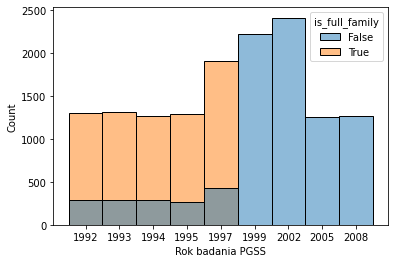

In [12]:
import seaborn as sns
df1 = df.copy()
not_doctor = lambda df1: ~(df1[respondent_profession].isin(medicine_related_jobs))
module_all_soc = df1[not_doctor(df1)][target_columns]
for col in module_all_soc:
    if col not in [year_column,respondent_profession]:
        module_all_soc[col] = module_all_soc[col].map(find_values_for_column(col))

def is_full_family(entry):
    return entry["14L: Struktura rodziny"] == 'Z MATKA I OJCEM'

family_column = 'is_full_family'
module_all_soc[family_column] = module_all_soc.apply(is_full_family, 'columns')
sns.histplot(module_all_soc, x=year_column, hue=family_column)

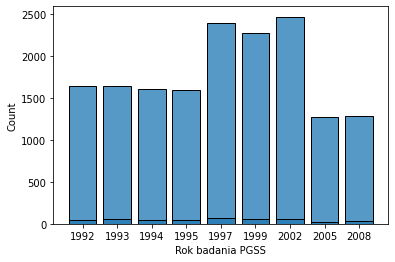

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
for data in [df, module_df]:
    sns.histplot(data, x=year_column, discrete=True, shrink=.8)


<AxesSubplot:xlabel='Rok badania PGSS', ylabel='Count'>

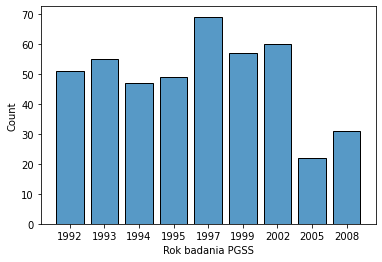

In [14]:
# Number of doctors with full family in distribution
sns.histplot(module_df, x=year_column, shrink=.8)

<AxesSubplot:xlabel='Rok badania PGSS', ylabel='Count'>

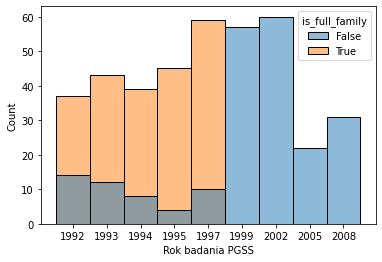

In [15]:
def is_full_family(entry):
    return entry['14L: Struktura rodziny'] == 'Z MATKA I OJCEM'

family_column = 'is_full_family'
module_df[family_column] = module_df.apply(is_full_family, 'columns')
sns.histplot(module_df, x=year_column, hue=family_column)

In [ ]:
module_df.shape

(15793, 41)

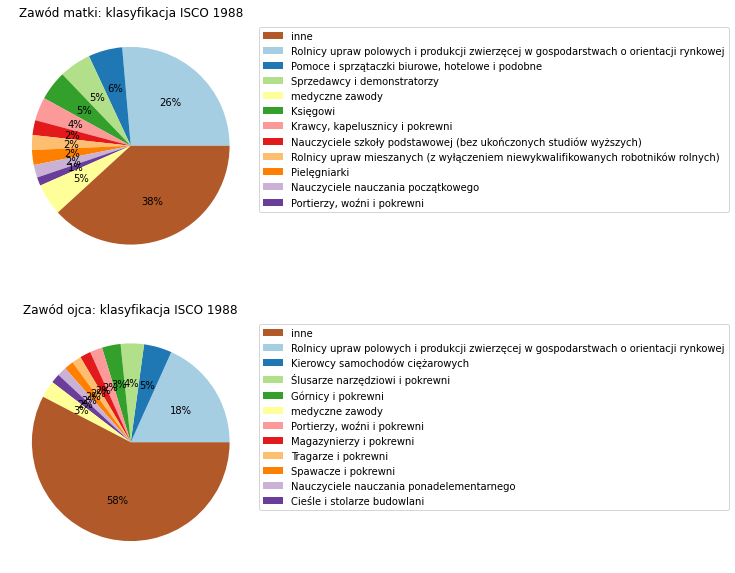

In [16]:
def draw_profession_pie_chart(df, column, n_professions, axs, title=None):
    professions = df.groupby(column)[year_column].count().sort_values(ascending=False)
    if n_professions == -1:
        n_professions = professions.shape[0]
    top_professions = professions[:n_professions]
    professions = professions[n_professions:]
    values = [*top_professions.values]
    labels=[*top_professions.keys()]
    medical_professionals_sum = professions.loc[professions.index.intersection(medicine_related_jobs)].sum()
    if medical_professionals_sum > 0:
        values.append(medical_professionals_sum)
        labels.append('medyczne zawody')
    
    other_professions = professions.sum() - medical_professionals_sum
    if other_professions > 0:
        values.append(other_professions)
        labels.append('inne')
    colors = sns.color_palette('Paired')[:(n_professions+2)]
    patches, *_ = axs.pie(values, colors = colors, autopct='%.0f%%', radius=1)
    patches, labels, _ = zip(*sorted(zip(
        patches, labels, values
    ), key=lambda t: t[2], reverse=True))
    axs.legend(patches, labels, loc='upper left', bbox_to_anchor=(1, 1))
    axs.set_title(title or column)



n_professions = 10
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
mother_profession = 'Zawód matki: klasyfikacja ISCO 1988'
father_profession = 'Zawód ojca: klasyfikacja ISCO 1988'
draw_profession_pie_chart(module_df, mother_profession, n_professions, axs[0])
draw_profession_pie_chart(module_df, father_profession, n_professions, axs[1])


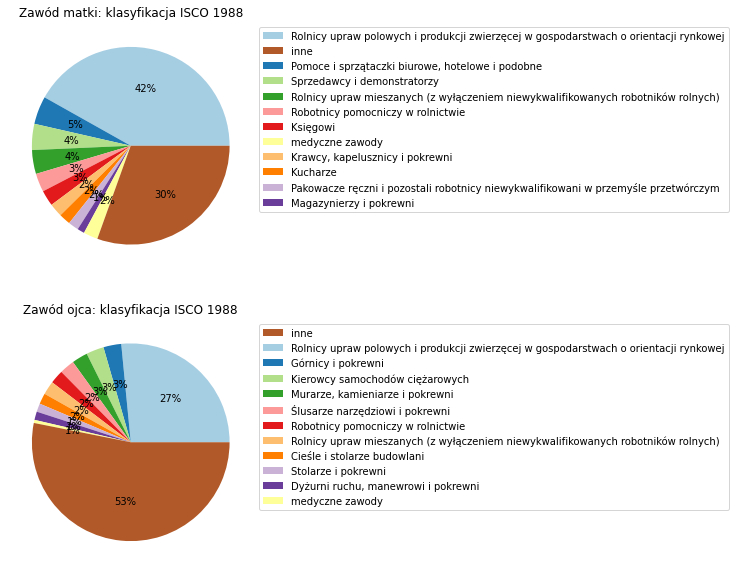

In [17]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

df[mother_profession] = df[mother_profession].map(find_values_for_column(mother_profession))
df[father_profession] = df[father_profession].map(find_values_for_column(father_profession))
draw_profession_pie_chart(df, mother_profession, n_professions, axs[0])
draw_profession_pie_chart(df, father_profession, n_professions, axs[1])



In [18]:
def is_parents_from_med(row):
    return row[mother_profession] in medicine_related_jobs or row[father_profession]  in medicine_related_jobs


doctors_with_parents_from_med = module_df[module_df.apply(is_parents_from_med, 'columns')]
doctors_with_parents_from_other_bg = module_df[module_df.apply(lambda r: not is_parents_from_med(r), 'columns')]

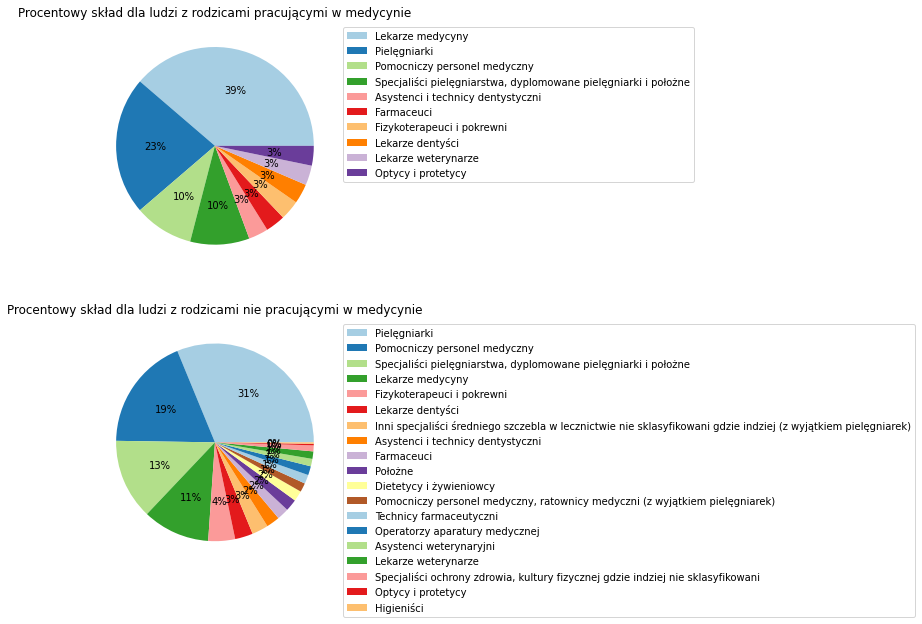

In [19]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
draw_profession_pie_chart(doctors_with_parents_from_med, respondent_profession, -1, axs[0], 'Procentowy skład dla ludzi z rodzicami pracującymi w medycynie')
draw_profession_pie_chart(doctors_with_parents_from_other_bg, respondent_profession, -1, axs[1], 'Procentowy skład dla ludzi z rodzicami nie pracującymi w medycynie')


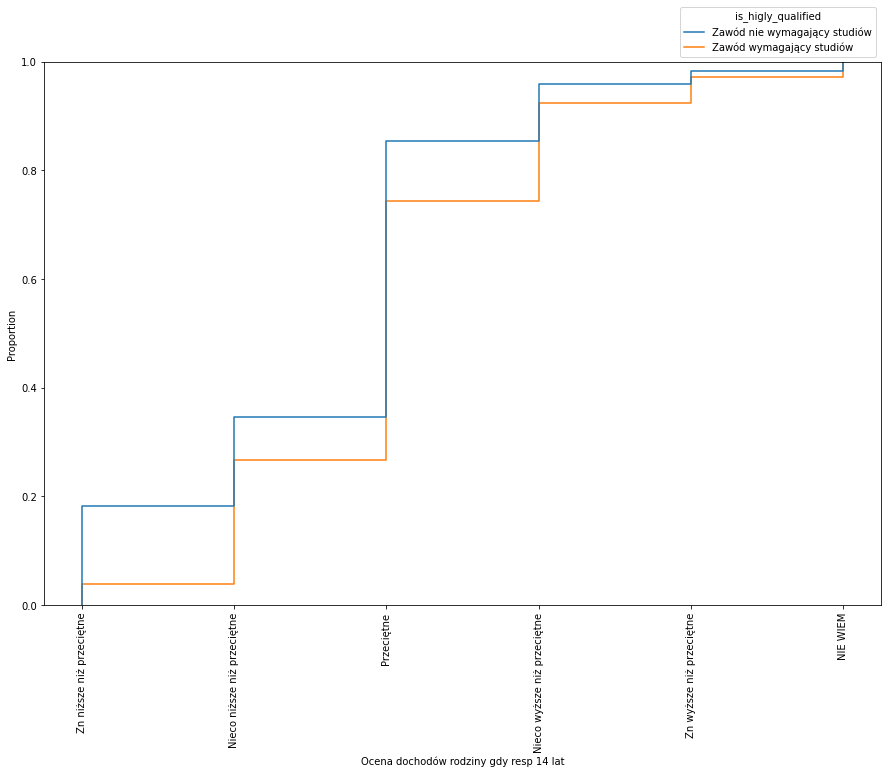

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
family_income = "Ocena dochodów rodziny gdy resp 14 lat"
module_df[family_income] = pd.Categorical(module_df[family_income], list(find_values_for_column(family_income).values())[:-1])

def is_higly_qualified_profession(row):
    is_higly_qualified = row[respondent_profession] in ['Lekarze medycyny', 'Lekarze dentyści', 'Dietetycy i żywieniowcy', 'Fizykoterapeuci i pokrewni', 'Farmaceuci']
    return 'Zawód wymagający studiów' if is_higly_qualified else 'Zawód nie wymagający studiów'

module_df['is_higly_qualified'] = module_df.apply(is_higly_qualified_profession, 'columns')
p = sns.ecdfplot(module_df, x=family_income, hue='is_higly_qualified', ax=ax, complementary=False)
sns.move_legend(p, "lower right", bbox_to_anchor=(1, 1))
ax.tick_params(axis='x', rotation=90)

Wnioski:

1. Zawód rodziców nie ma wpływu na to, czy ktoś podejmie studia lekarskie czy nie

2. W przypadku jeśli rodzice kogoś mieli zawód powiązany z medycyną jest wysoka szansa tego, że osoba zostanie lekarzeem, a nie będzie pracować na innym stanowisku medycznym

3. Poniżej 40% pracowników medycznych pochodzi z rodzin które miały dochód mniejszy niż przeciętny

4. Dochód rodziny nie ma znaczącego wpływu na to czy osoba pójdzie na studia medyczne, czy nie

## Analiza lekarza w okresie po studiach

In [ ]:
target_columns = [
    year_column,
    respondent_profession,
    'Stawiam sobie na ogół trudne i ambitne cele',
    'Nieszczęśliwy, w depresji',
    'Zniechęcony, znudzony',
    'Zaangażowanie respondenta w pracy',
    'Woli więcej pracować i wiecej zarabiać',
    'Moja praca jest pewna',
    'Mój dochód jest wysoki',
    'Moje szanse na awans są duże',
    'Moja praca jest interesująca',
    'Mogę pracować niezależnie',
    'Mogę w pracy pomagać innym',
    'Moja praca jest użyteczna dla społeczeństwa',
    'Jak często wraca z pracy wyczerpany',
    'Jak często praca wywołuje stres',
    'Zmieniłby obecny rodzaj pracy na inny',
    'Nie zmieni pracy nawet za wyższą płacę',
    'Jest dumny z rodzaju wykonywanej pracy',
    'Czy obawia się utraty pracy',
]
module_df = df[is_doctor(df)][target_columns]
for col in module_df:
    if col not in [year_column,respondent_profession]:
        module_df[col] = module_df[col].map(find_values_for_column(col))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441 entries, 11 to 16219
Data columns (total 20 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Rok badania PGSS                             441 non-null    object
 1   Zawód resp: klasyfikacja ISCO 1988           441 non-null    object
 2   Stawiam sobie na ogół trudne i ambitne cele  33 non-null     object
 3   Nieszczęśliwy, w depresji                    33 non-null     object
 4   Zniechęcony, znudzony                        33 non-null     object
 5   Zaangażowanie respondenta w pracy            31 non-null     object
 6   Woli więcej pracować i wiecej zarabiać       31 non-null     object
 7   Moja praca jest pewna                        31 non-null     object
 8   Mój dochód jest wysoki                       31 non-null     object
 9   Moje szanse na awans są duże                 30 non-null     object
 10  Moja praca 

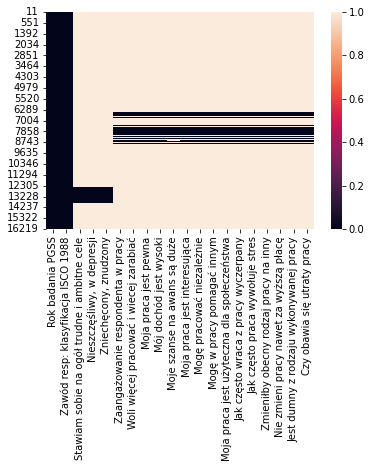

In [ ]:
sns.heatmap(module_df.isna())
module_df.info()

## Analiza społeczeństwa - bez grupy zawodów medycznych



In [21]:
not_doctor = lambda df: ~(df[respondent_profession].isin(medicine_related_jobs))
target_columns_soc =  [
    'Rok badania PGSS',
    'Pożądane w pracy: najważniejsza rzecz',
'Pożądane w pracy: na drugim miejscu',
'Pożądane w pracy: na trzecim miejscu',
'Pożądane w pracy: na czwartym miejscu',
'Pożądane w pracy: na ostatnim/piątym miejscu',
'Wysokie dochody: jak ważne w pracy',
'Pewność pracy: jak ważna',
'Czas pracy: jak ważny',
'Możliwość awansu: jak ważna',
'Sensowność pracy: jak ważna',
'Być lubianym lub popularnym: ranga',
'Samodzielnie myśleć: ranga',
'Być pracowitym: ranga',
'Pomagać innym: ranga',
'ZAUF do służby zdrowia /x',
'ZAUF do służby zdrowia /y',


]
module_soc = df[not_doctor(df)][target_columns_soc]
module_df_1 = df[is_doctor(df)][target_columns_soc]
module_soc.head()

,Rok badania PGSS,Pożądane w pracy: najważniejsza rzecz,Pożądane w pracy: na drugim miejscu,Pożądane w pracy: na trzecim miejscu,Pożądane w pracy: na czwartym miejscu,Pożądane w pracy: na ostatnim/piątym miejscu,Wysokie dochody: jak ważne w pracy,Pewność pracy: jak ważna,Czas pracy: jak ważny,Możliwość awansu: jak ważna,Sensowność pracy: jak ważna,Być lubianym lub popularnym: ranga,Samodzielnie myśleć: ranga,Być pracowitym: ranga,Pomagać innym: ranga,ZAUF do służby zdrowia /x,ZAUF do służby zdrowia /y
0,1992,1.0,2.0,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,4.0,1.0,2.0,3.0,2.0,NaN
1,1992,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5.0,4.0,1.0,2.0,2.0,NaN
2,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,2.0,3.0,2.0,NaN
3,1992,5.0,2.0,1.0,4.0,3.0,3.0,2.0,5.0,4.0,1.0,4.0,1.0,2.0,3.0,2.0,NaN
4,1992,5.0,1.0,2.0,4.0,3.0,2.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,5.0,2.0,NaN


<AxesSubplot:xlabel='Pewność pracy: jak ważna'>

<Figure size 640x480 with 0 Axes>

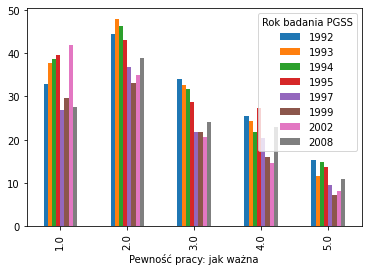

In [22]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
#module_soc = module_soc.fillna(0)
#module_soc.columns = pd.MultiIndex.from_frame(module_soc.columns.to_frame().fillna(0))
#def plot_grouped():
year_group = module_soc.groupby(['Pewność pracy: jak ważna'])
#year_group['Rok badania PGSS'].value_counts().plot(kind="bar")
year_group_vals = year_group['Rok badania PGSS'].value_counts().apply(lambda x: x/10).unstack()
year_group_vals.plot(kind="bar")
#year_respondents = module_soc['Rok badania PGSS'].value_counts()
# sns.barplot(x=year_group_vals.index, y=year_group_vals.values)

In [ ]:
# import numpy as np
# year_group = module_soc.groupby(['Rok badania PGSS'])
# year_group_v = year_group['Rok badania PGSS'].value_counts()
# module_soc['counts'] = np.where(year_group_v['Rok badania PGSS'] == module_soc['Rok badania PGSS']
# print(year_group_v)

SyntaxError: invalid syntax (Temp/ipykernel_14420/2268725298.py, line 5)

In [23]:

def plots_by_val(col_name, module_soc):
    year_group = module_soc.groupby(['Rok badania PGSS'])
    year_group_vals = year_group[col_name].value_counts().unstack()
    year_group_vals.plot(kind="bar")
    return year_group_vals

<Figure size 2400x1920 with 0 Axes>

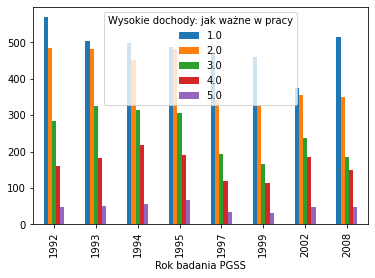

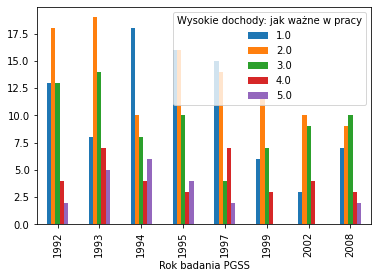

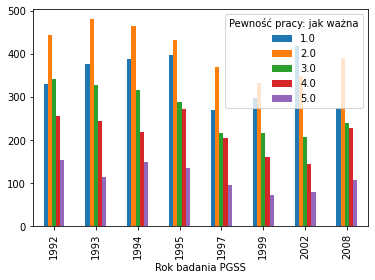

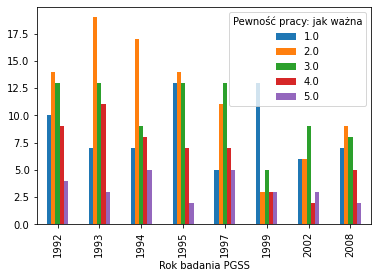

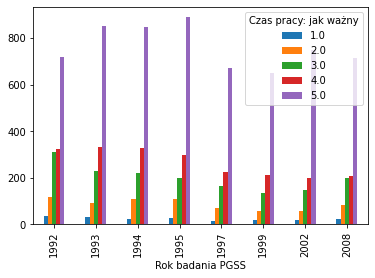

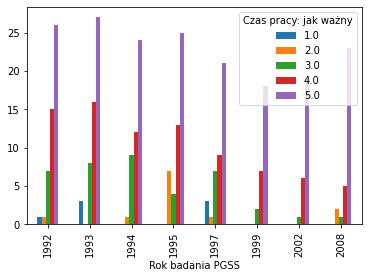

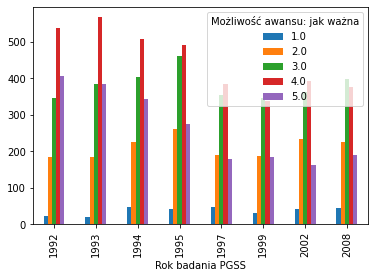

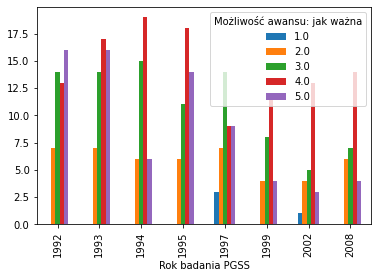

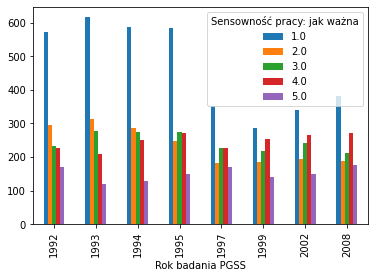

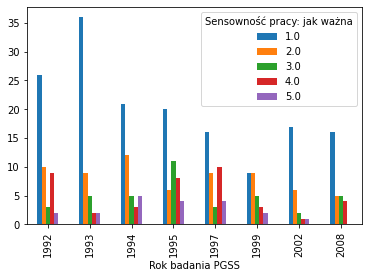

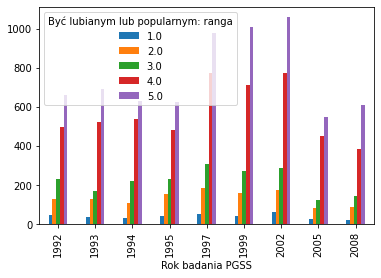

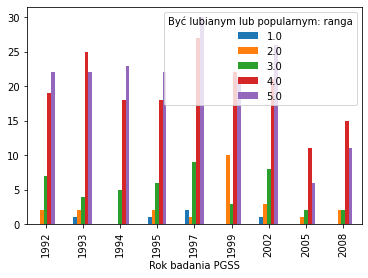

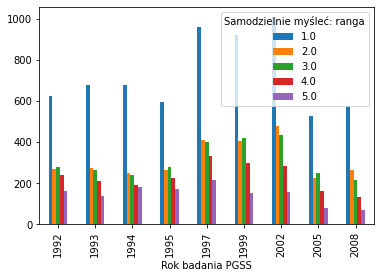

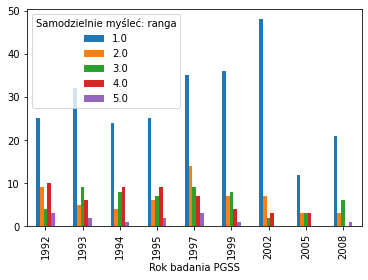

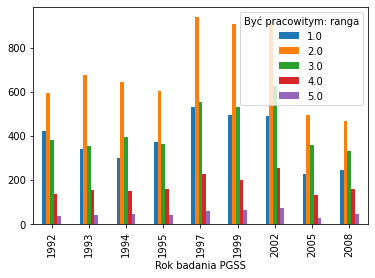

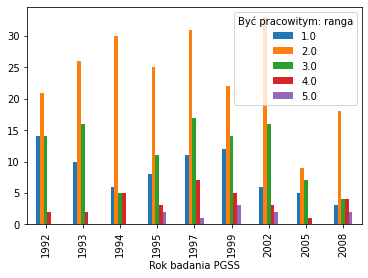

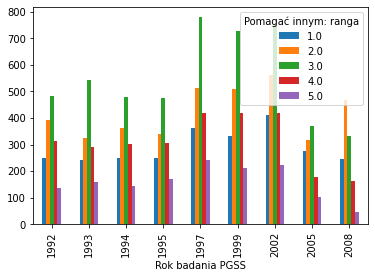

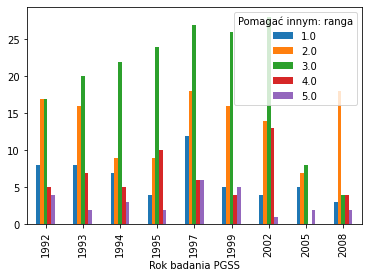

In [24]:
figure(figsize=(15, 12), dpi=160)
columns_important_values = ['Wysokie dochody: jak ważne w pracy',
'Pewność pracy: jak ważna',
'Czas pracy: jak ważny',
'Możliwość awansu: jak ważna',
'Sensowność pracy: jak ważna']
columns_hierarchy_values =[
'Być lubianym lub popularnym: ranga',
'Samodzielnie myśleć: ranga',
'Być pracowitym: ranga',
'Pomagać innym: ranga']
for n in columns_important_values:
    x = plots_by_val(n, module_soc)
    x1 = plots_by_val(n, module_df_1)
for l in columns_hierarchy_values:
    y = plots_by_val(l, module_soc)
    y1 = plots_by_val(l, module_df_1)


## Analiza podejścia do pracy i wartości wpływających na satysfakcję pracujących
Wysokie dochody - jak ważne:  

W ogóle ankietowanych widać, że wysokie dochody niezmiennie utrzymują się na pierwszym miejscu, w niektórych przypadkach będąc blisko drugiego. To samo pytanie zadane lekarzom pokazuje, że dochody są dla nich na drugim, a nawet trzecim (2008 r.) miejscu. W latach 1994-1997 wysokie dochody były dla lekarzy na pierwszym miejscu.  

Pewność pracy - jak ważna:  

Dla ogółu społeczeństwa pewność pracy plasuje się ogólnie na drugim miejscu - poza rokiem 2002 kiedy była ona na pierwszym miejscu. W przypadku lekarzy do 1995 pewność pracy jest wartością na drugim miejscu, w roku 1997 na trzecim, a w roku 1999 na pierwszym, po czym wraca na drugie miejsce.  

Czas pracy - jak ważny:  

Dla większości ankietowanych z ogółu społeczeństwa czas pracy jest na 5 miejscu w hierarchii. Podobnie ma się to w przypadku lekarzy - nieco większy procent ankietowanych lekarzy stawia czas pracy na czwartym miejscu, natomiast ogólnie czas pracy nie jest dla nich ważnym czynnikiem.   

Możliwość awansu - jak ważna:  

W społeczestwie możliwość awansu plasuje się stale przez badany okres na czwartym miejscu. Podobnie jest w przypadku lekarzy.  

Sensowność pracy: jak ważna  

Sensowność pracy jest najważniejsza dla ankietowanych (w społeczeństwie i wśród lekarzy) we wszystkich badanych latach. Wśród lekarzy procent osób wybierających sensowność pracy jako najważniejszą jest dużo wyższy.  


Podsumowując - zarówno w społeczeństwie jak i wśród lekarzy najważniejsza jest sensowność pracy (chociaż wśród lekarzy procent osób ją wybierających jest wyższy). Poza tym ważne są też wysokie zarobki - w społeczeństwie również plasują się one wysoko, wśród lekarzy odpowiedź na to pytanie jest bardziej zmienna. Możliwość awansu i czas pracy są ogólnie mało ważne zarówno wśród społeczeństwa jak i wśród lekarzy.




In [25]:
# x_to_concat = [plots_by_val(col) for col in columns_important_values]
# xx = pd.concat(x_to_concat, axis='columns', sort=False)
# print(xx[1.0])

TypeError: plots_by_val() missing 1 required positional argument: 'module_soc'

## Wartości którymi ankietowani kierują się w życiu


## Klastrowanie
Chcemy zgrupować ludzi na podstawie jakichś wybranych cech i potem zobaczyć, czy ludzie z tego samego klastra mają podobne zawody. 
Cechy do uwzględnienia:
1. Priorytety życiowe (w tym w pracy)
2. Przeszłość

 

In [50]:
all_target_columns = [
    "Zawód resp: klasyfikacja ISCO 1988",
    #year_column,
    #respondent_profession,
    # "14L: Mieszkał z macochą", 
    # "14L: Mieszkał z ojczymem", 
    # "14L: Mieszkał z siostrą/ami", 
    # "14L: Mieszkał z bratem/ćmi", 
    # "14L: Mieszkał z babcią", 
    # "14L: Mieszkał z dziadkiem", 
    # "14L: Mieszkał z ciotką", 
    # "14L: Mieszkał z wujem", 
    # "14L: Z innymi krewnymi", 
    # "14L: Z osobami spoza rodziny", 
    # "14L: Mieszkał w domu dziecka", 
    # "14L: Kto utrzymywał rodzinę #1", 
    # "14L: Kto utrzymywał rodzinę #2", 
    # "14L: Dlaczego rodzina niepełna", 
    # "14L: Struktura rodziny", 
    # "Liczba braci i sióstr", 
    # "Liczba starszych braci i sióstr", 
    # "Zawód ojca: klasyfikacja ISCO 1988", 
    # "Zawód ojca: klasyf ISCO 1988 /9 kat", 
    "Zawód ojca: klasyf ISCO 1988 /27 kat", 
    "Ojciec: skala poz ekon zawodu, Treiman 96", 
    "Ojciec: skala prestiżu zawodu, Treiman 96", 
    # "Ojciec kieruje/-wał pracą innych osób", 
    # "Poziom wykształcenia ojca", 
    # "Poziom wykształcenia ojca (od 2002r.)", 
    # "Lat nauki szkolnej ojca", 
    "Zawód matki: klasyfikacja ISCO 1988", 
    # "Zawód matki: klasyf ISCO 1988 /9 kat", 
    # "Zawód matki: klasyf ISCO 1988 /27 kat", 
    "Matka: skala poz ekon zaw, Treiman 96", 
    "Matka: skala prestiżu zawodu, Treiman 96", 
    # "Matka rolnikiem: liczba hektarów", 
    # "Matka właścicielem/prac najemnym", 
    # "Poziom wykształcenia matki", 
    # "Poziom wykształcenia matki(od 2002r.)", 
    # "Lat nauki szkolnej matki", 
    # "Wykształcenie matki: typ szkoły", 
    "Ocena dochodów rodziny gdy resp 14 lat",
     'Pożądane w pracy: najważniejsza rzecz',
# 'Pożądane w pracy: na drugim miejscu',
# 'Pożądane w pracy: na trzecim miejscu',
# 'Pożądane w pracy: na czwartym miejscu',
# 'Pożądane w pracy: na ostatnim/piątym miejscu',
'Wysokie dochody: jak ważne w pracy',
# 'Pewność pracy: jak ważna',
# 'Czas pracy: jak ważny',
# 'Możliwość awansu: jak ważna',
'Sensowność pracy: jak ważna',
'Być lubianym lub popularnym: ranga',
'Samodzielnie myśleć: ranga',
'Być pracowitym: ranga',
'Pomagać innym: ranga',
'ZAUF do służby zdrowia /x',
'ZAUF do służby zdrowia /y'
]
module_all = df_original[all_target_columns]
module_all.head()

,Zawód resp: klasyfikacja ISCO 1988,Zawód ojca: klasyf ISCO 1988 /27 kat,"Ojciec: skala poz ekon zawodu, Treiman 96","Ojciec: skala prestiżu zawodu, Treiman 96",Zawód matki: klasyfikacja ISCO 1988,"Matka: skala poz ekon zaw, Treiman 96","Matka: skala prestiżu zawodu, Treiman 96",Ocena dochodów rodziny gdy resp 14 lat,Pożądane w pracy: najważniejsza rzecz,Wysokie dochody: jak ważne w pracy,Sensowność pracy: jak ważna,Być lubianym lub popularnym: ranga,Samodzielnie myśleć: ranga,Być pracowitym: ranga,Pomagać innym: ranga,ZAUF do służby zdrowia /x,ZAUF do służby zdrowia /y
0,Monterzy usług elektronicznych,71.0,29.0,37.0,NaN,NaN,NaN,3.0,1.0,1.0,NaN,4.0,1.0,2.0,3.0,2.0,NaN
1,Robotnicy pomocniczy w rolnictwie,71.0,29.0,34.0,9322.0,24.0,22.0,3.0,1.0,1.0,NaN,5.0,4.0,1.0,2.0,2.0,NaN
2,"Pracownicy do spraw finansowych i handlowych, ...",98.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,4.0,1.0,2.0,3.0,2.0,NaN
3,Sprzedawcy i demonstratorzy,83.0,34.0,33.0,9152.0,27.0,20.0,3.0,5.0,3.0,1.0,4.0,1.0,2.0,3.0,2.0,NaN
4,"Fryzjerzy, kosmetyczki i pokrewni",61.0,23.0,38.0,6130.0,23.0,38.0,3.0,5.0,2.0,1.0,4.0,1.0,3.0,5.0,2.0,NaN


In [51]:
#one hot encoding of some columns with get dummies

module_all.fillna(0, inplace=True)
categorical_cols = ["Zawód ojca: klasyf ISCO 1988 /27 kat", "Zawód matki: klasyfikacja ISCO 1988","Zawód resp: klasyfikacja ISCO 1988"]
module_all = pd.get_dummies(module_all, columns = categorical_cols)

c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [52]:
# importing necessary libraries
import pandas as pd
import numpy as np
# !pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline



Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 188212.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2997, cost: 168990.0
Run 1, iteration: 2/100, moves: 817, cost: 168561.0
Run 1, iteration: 3/100, moves: 143, cost: 168561.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4997, cost: 158864.0
Run 1, iteration: 2/100, moves: 1139, cost: 158864.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5274, cost: 157068.0
Run 1, iteration: 2/100, moves: 1266, cost: 156992.0
Run 1, iteration: 3/100, moves: 69, cost: 156992.0


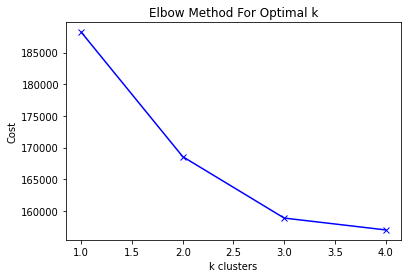

In [53]:
#plotting elbow to determine best number of clusters
module_all_c = module_all.iloc[:,:-1]
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(module_all_c)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('k clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [42]:
print(len(module_all_c.columns))

359


In [48]:
module_all_c = module_all.iloc[:,:-1]
# i tried cluster for 3 and 25
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(module_all_c)
module_all_c.insert(0, "Cluster", clusters, True)
module_all_c.head()

Init: initializing centroids
Init: initializing clusters


KeyboardInterrupt: 

In [54]:
clusters = kmode.fit_predict(module_all_c)
module_all_c.insert(0, "Cluster", clusters, True)
module_all_c.head()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5274, cost: 157068.0
Run 1, iteration: 2/100, moves: 1266, cost: 156992.0
Run 1, iteration: 3/100, moves: 69, cost: 156992.0


,Cluster,"Ojciec: skala poz ekon zawodu, Treiman 96","Ojciec: skala prestiżu zawodu, Treiman 96","Matka: skala poz ekon zaw, Treiman 96","Matka: skala prestiżu zawodu, Treiman 96",Ocena dochodów rodziny gdy resp 14 lat,Pożądane w pracy: najważniejsza rzecz,Wysokie dochody: jak ważne w pracy,Sensowność pracy: jak ważna,Być lubianym lub popularnym: ranga,...,Zawód resp: klasyfikacja ISCO 1988_Wyżsi urzędnicy samorządowi,Zawód resp: klasyfikacja ISCO 1988_Zamiatacze i pokrewni,Zawód resp: klasyfikacja ISCO 1988_Zaopatrzeniowcy,Zawód resp: klasyfikacja ISCO 1988_Zawodowi działacze organizacji społecznych,Zawód resp: klasyfikacja ISCO 1988_Zawodowi działacze organizacji związkowych,"Zawód resp: klasyfikacja ISCO 1988_Zdobnicy ceramiki, szkła i pokrewni",Zawód resp: klasyfikacja ISCO 1988_Ładowacze nieczystości,Zawód resp: klasyfikacja ISCO 1988_ŚREDNI PERSONEL TECHNICZNY,Zawód resp: klasyfikacja ISCO 1988_Ślusarze narzędziowi i pokrewni,Zawód resp: klasyfikacja ISCO 1988_Średni personel biurowy
0,0,29.0,37.0,0.0,0.0,3.0,1.0,1.0,0.0,4.0,...,0,0,0,0,0,0,0,0,0,0
1,2,29.0,34.0,24.0,22.0,3.0,1.0,1.0,0.0,5.0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,...,0,0,0,0,0,0,0,0,0,0
3,2,34.0,33.0,27.0,20.0,3.0,5.0,3.0,1.0,4.0,...,0,0,0,0,0,0,0,0,0,0
4,1,23.0,38.0,23.0,38.0,3.0,5.0,2.0,1.0,4.0,...,0,0,0,0,0,0,0,0,0,0


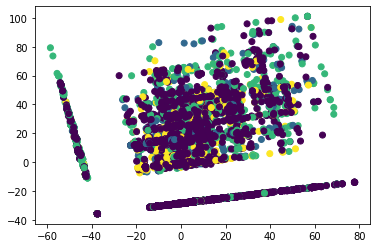

In [55]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(2)

plot_columns = pca.fit_transform(module_all_c.iloc[:,0:359])
# Plot based on the two dimensions, and shade by cluster label
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=module_all_c["Cluster"])
plt.show()


In [44]:
print(kmode.cluster_centroids_)

[[23. 38. 23. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [30. 40.  0. ...  0.  0.  0.]]


In [57]:
plt.subplots(figsize = (20,15))
module_all_c["Zawody"] = df_original["Zawód resp: klasyfikacja ISCO 1988"]

sns.countplot(x=module_all_c["Cluster"],hue=module_all_c["Zawody"], data = module_all_c)
plt.legend(bbox_to_anchor =(0.65, 1.25))
plt.show()